In [1]:
import xgboost as xgb
import matplotlib.pyplot as plt
from pylab import plot, show, subplot, specgram, imshow, savefig

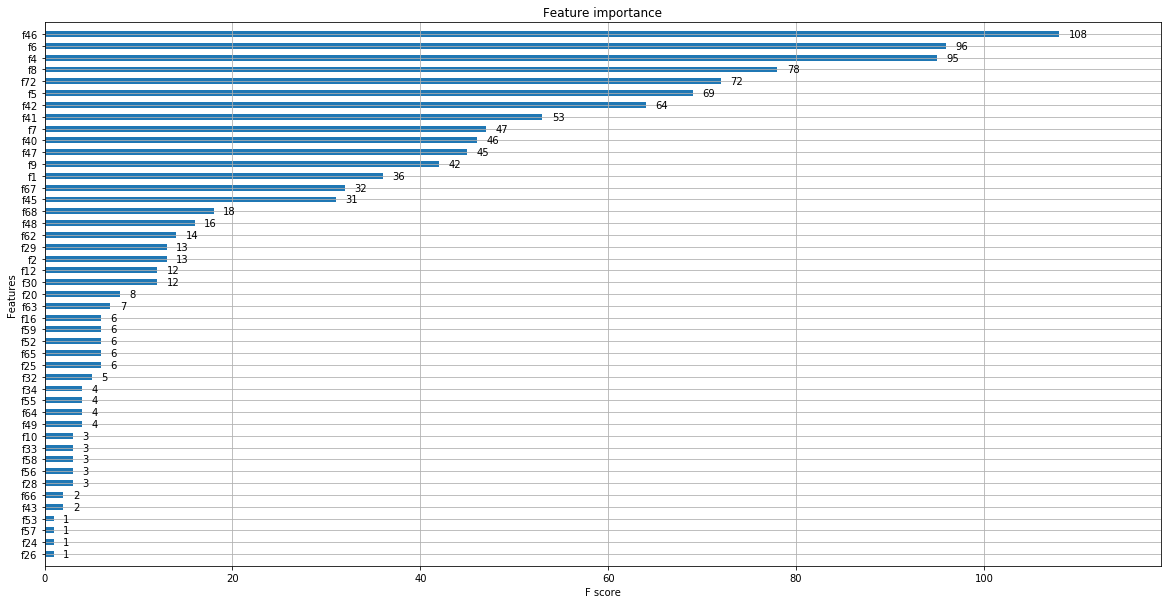

In [2]:
%matplotlib inline

bst = xgb.Booster()
bst.load_model('test7.model')
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_importance(bst, height=0.5, ax=ax)

In [ ]:
import operator
import pandas as pd

importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])

plt.figure()
num_f = 10
df[:num_f].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(20, 10))
#plt.gcf().savefig('features_importance.png')

In [3]:
import graphviz

Format: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot dot_json eps fig gv imap imap_np ismap json json0 mp pic plain plain-ext pov ps ps2 svg svgz tk vml vmlz xdot xdot1.2 xdot1.4 xdot_json


CalledProcessError: Command '['dot', '-Tpng']' returned non-zero exit status 1

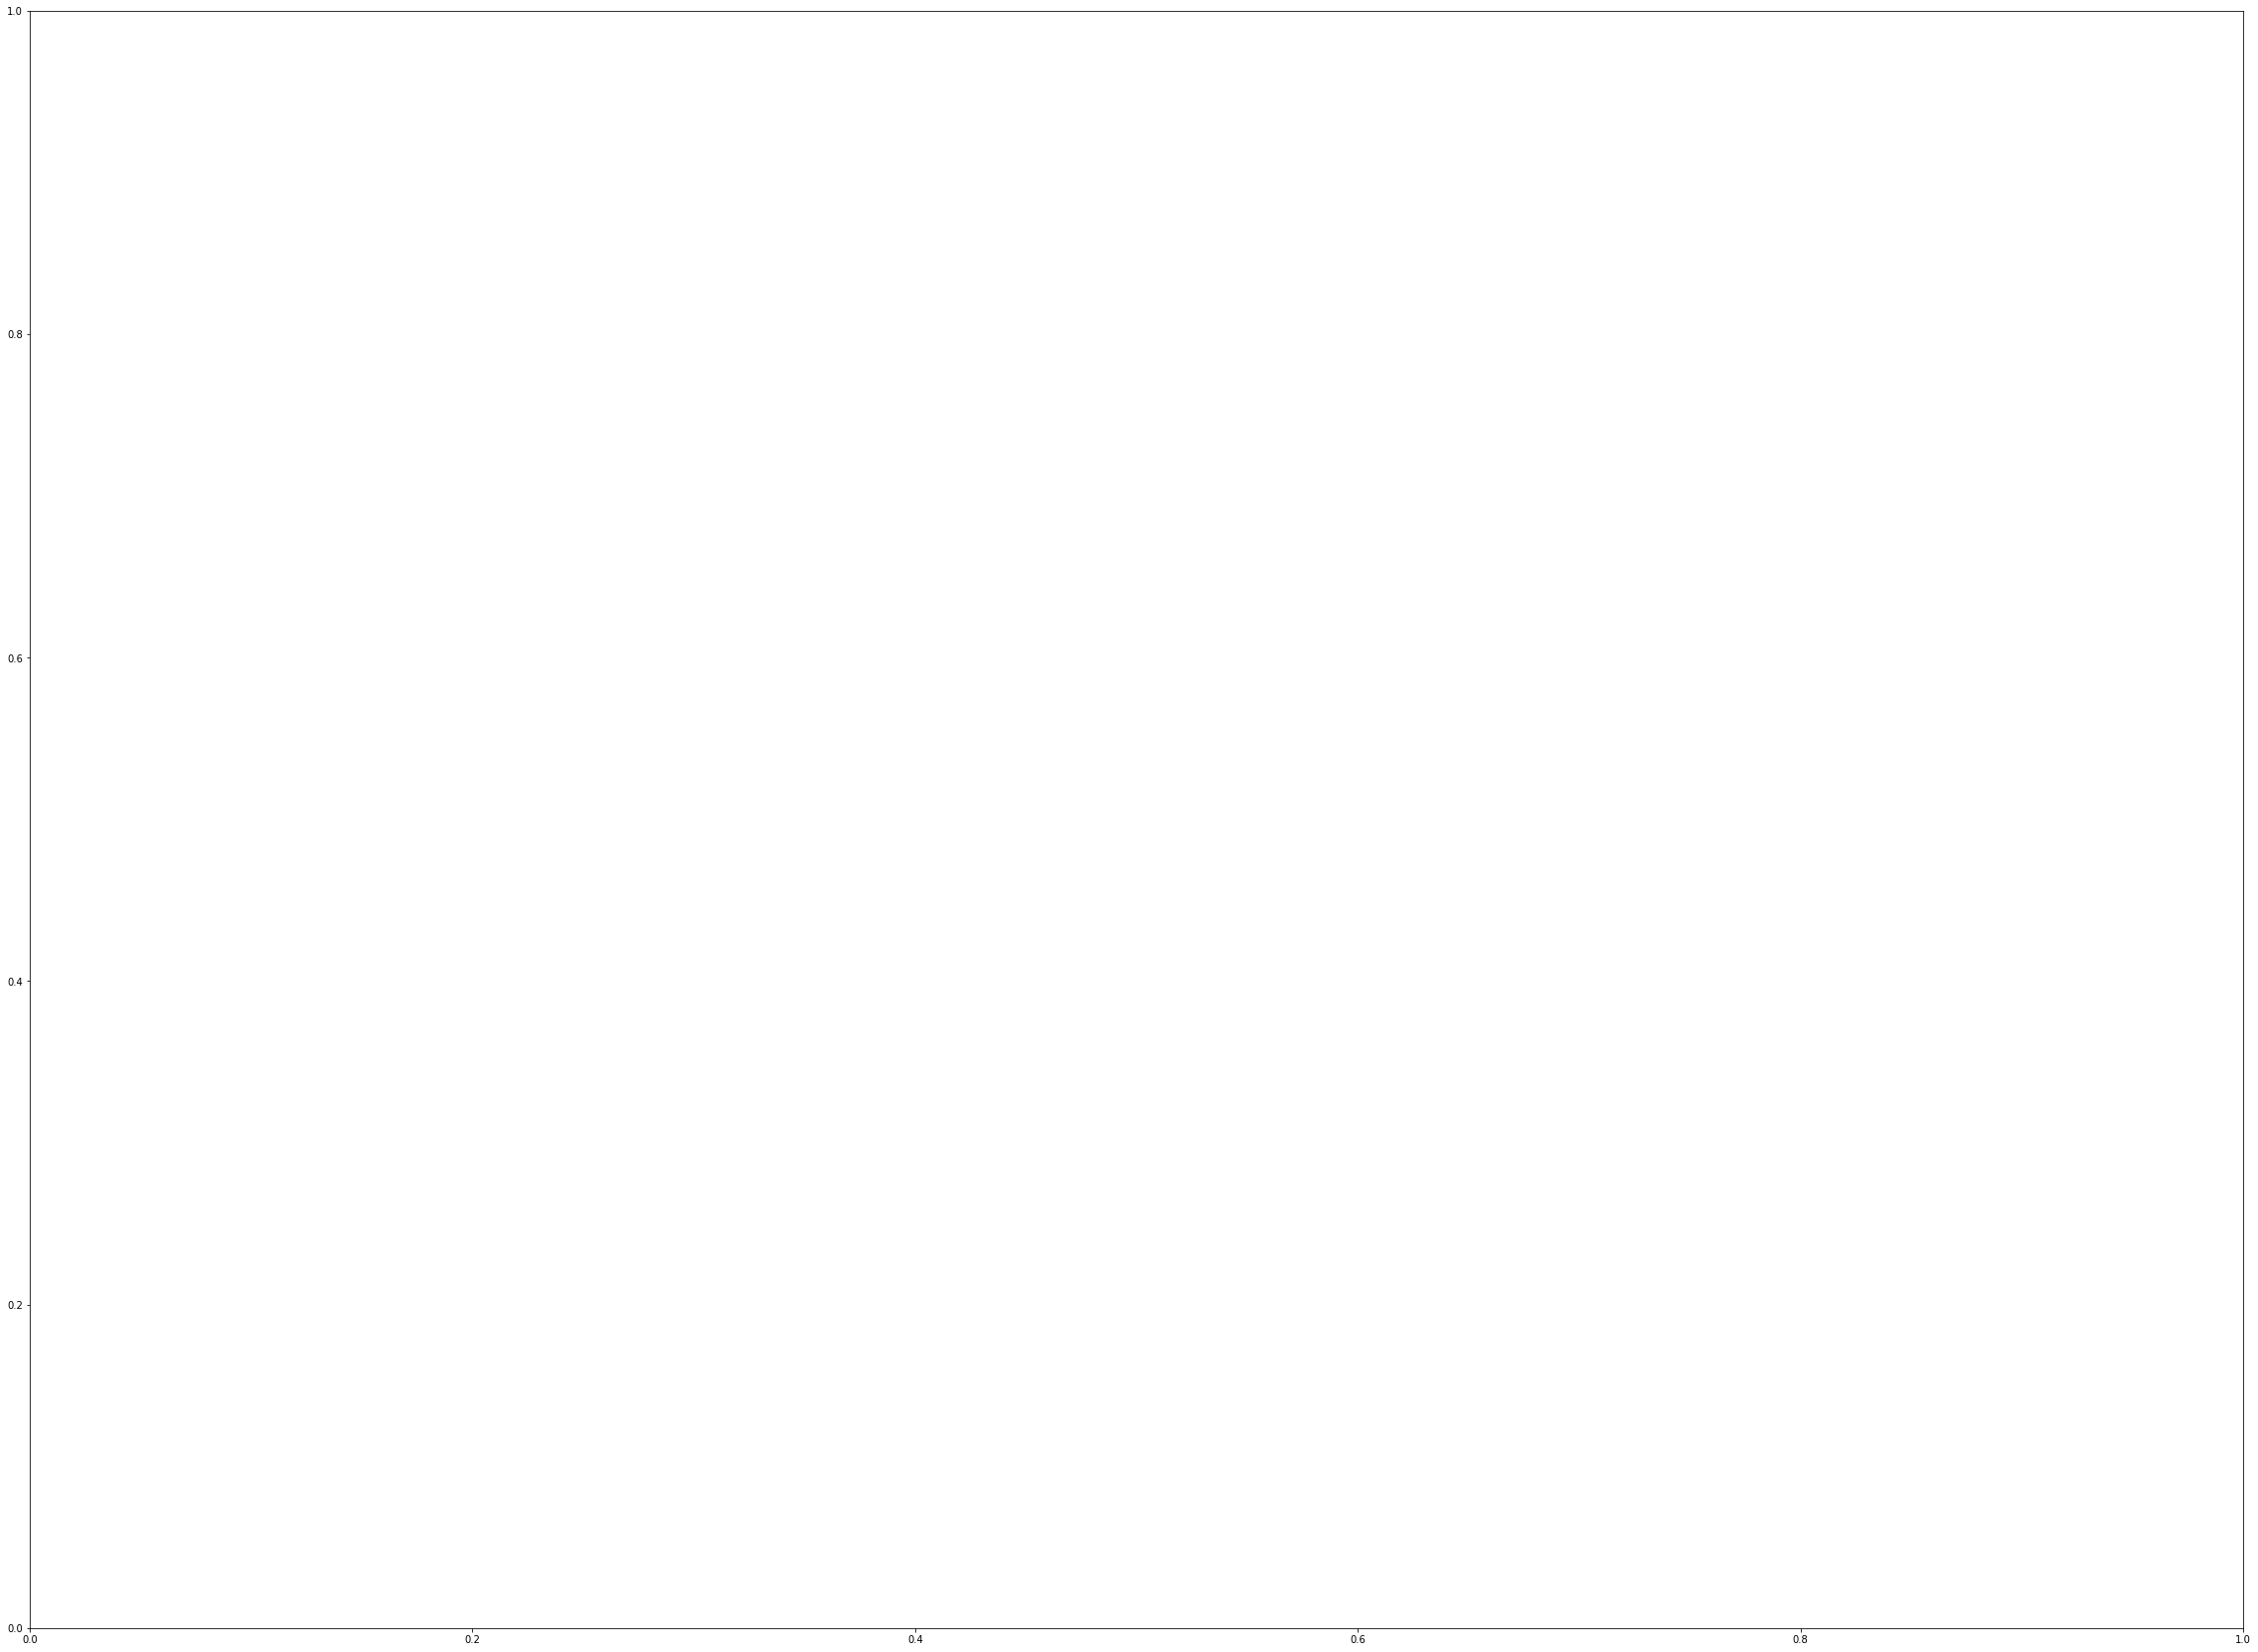

In [4]:
fig, ax = plt.subplots(figsize=(40, 30))
xgb.plot_tree(bst, fmap='xgb7.fmap',ax=ax)

In [ ]:
import pandas as pd
data = pd.read_csv('data/data_set_20171123.csv', encoding='u8')

In [ ]:
def extract(x, n):
    l = x.split('|')
    for elm in l:
        v = elm.split(':')
        if int(v[0]) == n:
            return int(float(v[1]))
    #print n
    raise Exception('no such period')

num = 3
#f_list = [u'本期逾期天数']
#f_list = [u'历史逾期次数']
#f_list=[u'逾期本金（元）']
f_list = [u'历史最长逾期天数']
df = data[f_list]
#[(data[u'标注']==0) & (data[u'贷款期数（月）'] == num)][f_list][:100]
for f in f_list:
    for i in xrange(2, num):
        df.loc[:, str(i)+'th_'+f] = df[f].apply(extract, args=(i,))
df

In [ ]:
df[u'5th'].value_counts()

In [ ]:
data[u'贷款期数（月）'].value_counts()

In [ ]:
df[u'4th_本期逾期天数'].describe()

In [ ]:
data[u'还款间隔（月）'].value_counts()

In [ ]:
len(df)